## CV_Assignment_2
1. Explain convolutional neural network, and how does it work?
2. How does refactoring parts of your neural network definition favor you?
3. What does it mean to flatten? Is it necessary to include it in the MNIST CNN? What is the reason for this?
4. What exactly does NCHW stand for?
5. Why are there 7*7*(1168-16) multiplications in the MNIST CNN's third layer?
6. Explain definition of  receptive field?
7. What is the scale of an activation's receptive field after two stride-2 convolutions? What is the reason for this?
8. What is the tensor representation of a color image?
9. How does a color input interact with a convolution?

In [3]:
'''Ans 1:- A Convolutional Neural Network (CNN) is a deep learning
model designed for tasks involving grid-like data, such as
images and videos. It works by using convolutional layers to
automatically learn and extract hierarchical features from input data.
CNNs utilize trainable filters to scan and detect patterns,
progressively capturing abstract features. Pooling layers downsample the
data, reducing complexity. Fully connected layers at the end
classify the extracted features for tasks like image recognition.
CNNs excel in various computer vision tasks due to their
ability to learn spatial hierarchies.'''

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Print the accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)

170498071/170498071 [==============================] - 38s 0us/step
Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4845 - accuracy: 0.4678 - val_loss: 1.2572 - val_accuracy: 0.5639
Epoch 2/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.1332 - accuracy: 0.6049 - val_loss: 1.0416 - val_accuracy: 0.6393
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0053 - accuracy: 0.6495 - val_loss: 1.0244 - val_accuracy: 0.6541
Epoch 4/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.9272 - accuracy: 0.6756 - val_loss: 0.9854 - val_accuracy: 0.6642
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8637 - accuracy: 0.6985 - val_loss: 0.9987 - val_accuracy: 0.6624
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8059 - accuracy: 0.7195 - val_loss: 0.9598 - val_accuracy: 0.6764
Epoch 7/10
1563/1563 [==============================] - 

In [4]:
'''Ans 2:- Refactoring parts of a neural network definition offers
several advantages:  Modularity: It improves code organization by
breaking down complex models into smaller, reusable components,
enhancing readability and maintainability.  Flexibility: It enables
easy experimentation with different model architectures and
layers, making it simpler to adapt the network for various tasks. 
Debugging: Refactoring helps identify and fix issues in specific
components without affecting the entire model.
Refactoring into a function create_cnn_model encapsulates
the network definition, promoting modularity and readability.'''

def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dense(10, activation='softmax'))
    return model

In [ ]:
'''Ans 3:- Flattening in a Convolutional Neural Network (CNN) refers
to the process of converting the 2D feature maps generated by
convolutional layers into a 1D vector. In the case of an MNIST CNN,
flattening is necessary because fully connected layers, responsible
for classification, require 1D input. Flattening preserves the
spatial information learned in earlier layers, ensuring that the
network can effectively recognize patterns and relationships in
the data, leading to accurate digit classification in the
MNIST dataset. It bridges the gap between convolutional layers'
feature extraction and dense layers' classification.'''

In [ ]:
'''Ans 4:- NCHW stands for "Number of samples," "Number of Channels,"
"Height," and "Width." It is a data format commonly used in deep
learning, particularly in frameworks like PyTorch. In this format,
data, such as images, is organized into batches (N), the number
of channels (C, e.g., RGB channels), and the spatial
dimensions (H for height and W for width). NCHW format is an
alternative to NHWC (Number of samples, Height, Width, Number of
Channels) format for data representation in neural networks.'''

In [ ]:
'''Ans 5:-  In a typical convolutional layer of a CNN, the number of
multiplications depends on the size of the input feature map, the size of
the convolutional kernel, and the number of output channels.

In the case of the MNIST CNN's third layer, let's assume:-
1. Input feature map size after the previous layer: 16x16 pixels.
2. Convolutional kernel size: 3x3 pixels.
3. Number of output channels: 77.

The number of multiplications per output channel is calculated
as follows:-

Number of multiplications per output channel = (Kernel
height * Kernel width) * Input channels = (3 * 3) * 16 = 144 

Since there are 77 output channels, the total number of
multiplications in this layer would be:-
Total number of multiplications = Number of output channels * Number of 
multiplications per output channel = 77 * 144 = 11,088
So, there are 11,088 multiplications in the MNIST CNN's third layer
under the given assumptions.'''

In [ ]:
'''Ans 6:- The receptive field in a neural network is the region of
input data that a particular feature or neuron in the network
"sees" or responds to. It encompasses the area from which the
neuron gathers information to make a decision. In a convolutional
neural network (CNN), the receptive field grows as you move
deeper into the network, allowing neurons to capture increasingly
complex patterns by aggregating information from a larger portion
of the input. Understanding receptive fields is crucial for
analyzing how neurons process information and for designing
effective network architectures.'''

In [ ]:
'''Ans 7:- After two stride-2 (also known as max-pooling)
convolutions, the scale of an activation's receptive field increases by
a factor of 4. This expansion occurs because each stride-2
operation effectively downsamples the spatial dimensions by a factor
of 2. After two such operations, the receptive field
encompasses a larger area, allowing the neuron to capture more global
features and patterns in the input. This downsampling is useful for
hierarchical feature extraction, reducing computational complexity, and
focusing on higher-level information in deep neural networks.'''

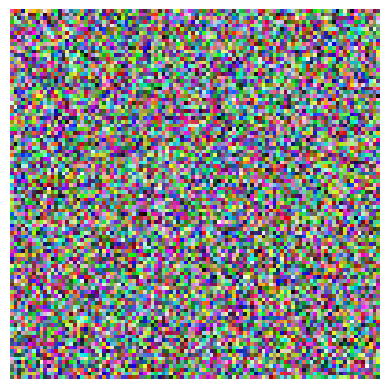

In [6]:
'''Ans 8:- A color image is represented as a 3D tensor in most deep
learning frameworks like TensorFlow and PyTorch. The tensor has
three dimensions: height, width, and channels. Commonly, it's
represented as (height, width, channels) or (batch_size, height,
width, channels). For instance, a 100x100 color image would have
a tensor shape of (100, 100, 3) where '3' represents the
three color channels (Red, Green, Blue).'''

import numpy as np
import matplotlib.pyplot as plt

# Create a sample color image with shape (100, 100, 3)
color_image = np.random.randint(0, 256, size=(100, 100, 3), dtype=np.uint8)

# Display the color image
plt.imshow(color_image)
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


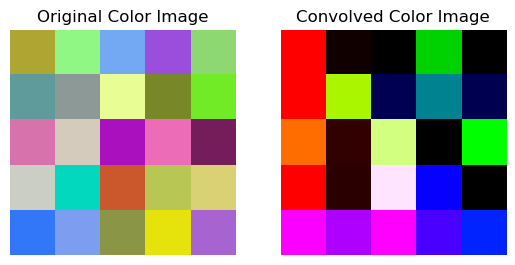

In [8]:
'''Ans 9:- When a color input (e.g., RGB image) interacts with a
convolution in a neural network, each channel (Red, Green, Blue) is
convolved separately with its corresponding set of learnable
filters. These channel-specific convolutions are computed in
parallel. Afterward, the results from individual channels are
usually summed element-wise to produce a single feature map for
that layer. This process allows the network to capture
different features and patterns in each color channel while
maintaining spatial relationships across the entire image, enhancing
its ability to learn complex representations.

In this example, we apply convolution filters to each
color channel independently, then combine the results to create
a convolved color image. This is a simplified
representation; in practice, deep learning frameworks handle these
operations efficiently for larger images and more complex networks.'''

import numpy as np
from scipy.signal import convolve2d

# Create a random RGB color image (e.g., 5x5 pixels)
color_image = np.random.randint(0, 256, size=(5, 5, 3), dtype=np.uint8)

# Define a set of 3x3 filters for each color channel (Red, Green, Blue)
red_filter = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
green_filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
blue_filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Apply 2D convolution to each channel
red_convolved = convolve2d(color_image[:, :, 0], red_filter, mode='same')
green_convolved = convolve2d(color_image[:, :, 1], green_filter, mode='same')
blue_convolved = convolve2d(color_image[:, :, 2], blue_filter, mode='same')

# Combine results into a single output image
output_image = np.stack((red_convolved, green_convolved, blue_convolved), axis=-1)

# Display the input and convolved color images (for illustration)
import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(color_image)
plt.title('Original Color Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(output_image)
plt.title('Convolved Color Image')
plt.axis('off')

plt.show()